<a href="https://colab.research.google.com/github/PatrykCiwinski/Project_CNN/blob/main/CNN_beverages_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
data_dir = '/content/drive/MyDrive/alkohole/data'

In [4]:
os.listdir(data_dir)

['train', 'test']

In [5]:
train_path=data_dir+'/train/'
test_path=data_dir+'/test/'

In [6]:
train_path

'/content/drive/MyDrive/alkohole/data/train/'

In [7]:
bezalko_train_first = train_path+'bezalkoholowe/'+os.listdir(train_path+'/bezalkoholowe')[0]

In [8]:
bezalko_train_first

'/content/drive/MyDrive/alkohole/data/train/bezalkoholowe/tloczone-jablko-i-pigwa-250-ml.jpg'

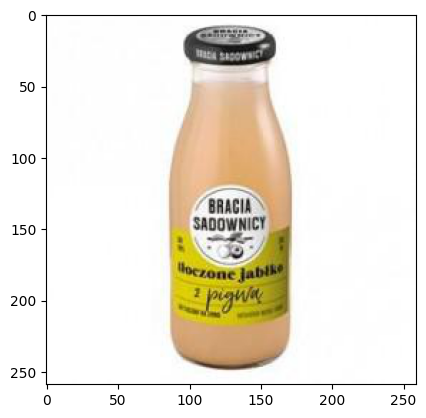

In [9]:
plt.imshow(imread(bezalko_train_first));

In [10]:
wysoko_train_first = train_path+'wysokoprocentowe/'+os.listdir(train_path+'/wysokoprocentowe')[0]

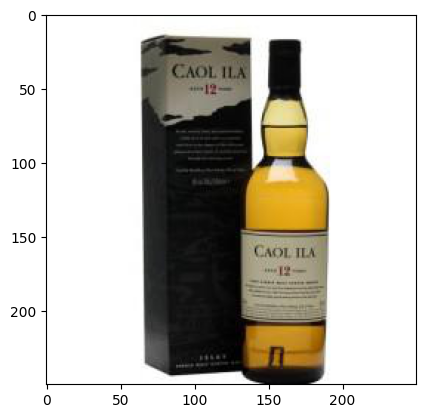

In [11]:
plt.imshow(imread(wysoko_train_first));

In [12]:
data_path = '/content/drive/MyDrive/alkohole/data'
os.makedirs(data_path + '/test', exist_ok=True)
test_size = 0.2

for subcategory in ['bezalkoholowe', 'średnioprocentowe','wysokoprocentowe']:
  os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/train/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)
  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/train/' + subcategory + '/' + file_name,
              data_path + '/test/' + subcategory + '/' + file_name)

In [13]:
len(os.listdir(test_path + '/bezalkoholowe'))

191

In [14]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_path+'/bezalkoholowe'):
    img = imread(test_path+'/bezalkoholowe/'+image_name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [15]:
img_w = int(np.mean(dim1)//1)

In [16]:
img_h = int(np.mean(dim2)//1)

In [17]:
image_shape = (img_h,img_w,3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [20]:
wysoko_img = imread(wysoko_train_first)

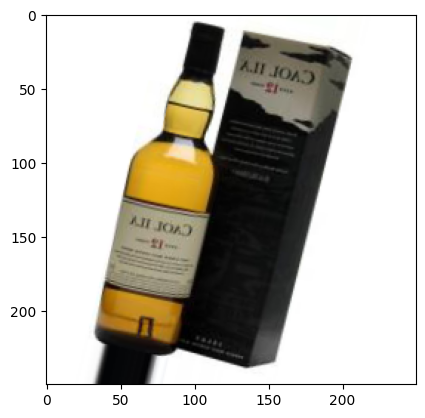

In [21]:
plt.imshow(image_gen.random_transform(wysoko_img))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [23]:
model = Sequential()


model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 257, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
es = EarlyStopping(monitor='val_loss',patience=3)
batch_size = 16

In [27]:
train_image = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 838 images belonging to 3 classes.


In [28]:
test_image = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          shuffle=False)

Found 422 images belonging to 3 classes.


In [29]:
history = model.fit(train_image, epochs=20,validation_data=test_image,
                    callbacks=[es])

Epoch 1/20
53/53 [==============================] - 186s 3s/step - loss: 41.6756 - accuracy: 0.5453 - val_loss: 0.9931 - val_accuracy: 0.6588
Epoch 2/20
53/53 [==============================] - 25s 471ms/step - loss: 0.9109 - accuracy: 0.6014 - val_loss: 0.8902 - val_accuracy: 0.6611
Epoch 3/20
53/53 [==============================] - 24s 462ms/step - loss: 0.8281 - accuracy: 0.5990 - val_loss: 0.7680 - val_accuracy: 0.6754
Epoch 4/20
53/53 [==============================] - 25s 470ms/step - loss: 0.7715 - accuracy: 0.6146 - val_loss: 0.7421 - val_accuracy: 0.6801
Epoch 5/20
53/53 [==============================] - 24s 460ms/step - loss: 0.7859 - accuracy: 0.5979 - val_loss: 0.7358 - val_accuracy: 0.6540
Epoch 6/20
53/53 [==============================] - 24s 459ms/step - loss: 0.7709 - accuracy: 0.6146 - val_loss: 0.6985 - val_accuracy: 0.6872
Epoch 7/20
53/53 [==============================] - 26s 500ms/step - loss: 0.7407 - accuracy: 0.6396 - val_loss: 0.7298 - val_accuracy: 0.6398


In [30]:
result = pd.DataFrame(history.history)

<Axes: >

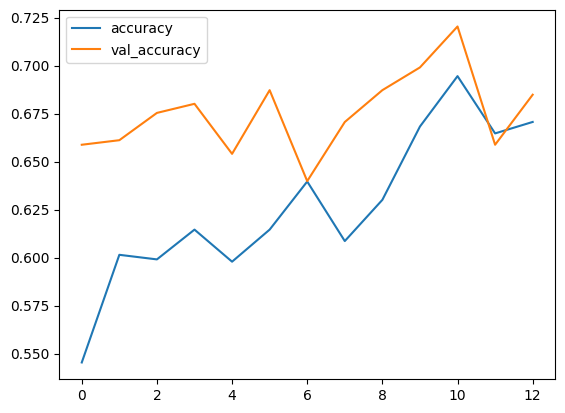

In [32]:
result[['accuracy','val_accuracy']].plot()

<Axes: >

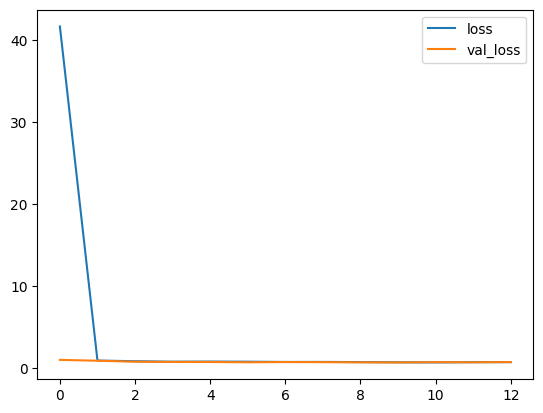

In [33]:
result[['loss','val_loss']].plot()

In [34]:
from sklearn.metrics import classification_report

In [46]:
predict = model.predict(test_image)

27/27 [==============================] - 8s 292ms/step


In [47]:
predictions=np.argmax(predict,axis=1)

In [48]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0,

In [49]:
print(classification_report(test_image.classes,predictions))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       191
           1       0.85      0.86      0.86        95
           2       0.64      0.43      0.51       136

    accuracy                           0.72       422
   macro avg       0.73      0.71      0.71       422
weighted avg       0.71      0.72      0.70       422



In [50]:
from tensorflow.keras.preprocessing import image

In [112]:
my_image = image.load_img('/content/drive/MyDrive/alkohole/data/test/bezalkoholowe/moon-brothers-lemoniada-soczysta-arbuz-z-mieta-330-ml-6-sztuk.jpg',target_size=image_shape)

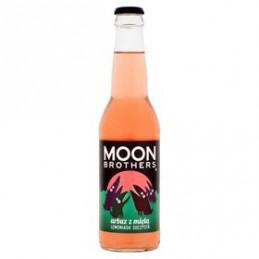

In [113]:
my_image

In [114]:
my_image = image.img_to_array(my_image)

In [115]:
my_image = np.expand_dims(my_image, axis=0)

In [116]:
my_image.shape

(1, 259, 259, 3)

In [117]:
pred_img=model.predict(my_image)

1/1 [==============================] - 0s 27ms/step


In [118]:
prediction_img=np.argmax(pred_img,axis=1)

In [119]:
prediction_img

array([0])

In [95]:
test_image.class_indices

{'bezalkoholowe': 0, 'średnioprocentowe': 1, 'wysokoprocentowe': 2}